In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML, Image
from scipy.stats import ttest_ind_from_stats, spearmanr
from sklearn.preprocessing import StandardScaler
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
 
import tqdm
import math
from scipy.special import softmax,expit
import torch
%matplotlib inline
from torch.autograd import Variable


In [3]:
# autoreload sets up auto reloading of modified .py modules
import autoreload
%load_ext autoreload
%autoreload 2
from utils import *

In [16]:
if torch.__version__ != '1.10.0':
    print('You need to upgrade PyTorch before running this code.')

else:
    print('Ready to go!')

Ready to go!


# Optimization tests

## Model specification

In [22]:
d = 2
T = 2
N = 500

In [23]:
true_A = np.identity(d) + np.random.randn(d,d)
true_B = np.diag(np.random.uniform(low=-0.8,high=0.8,size=d)) 

#small_noise = 1/2*np.random.randn(1)
true_sigma = np.diag(np.random.uniform(low=1,high=4,size=d)) 
sigma_inv = np.linalg.inv(true_sigma)
print(sigma_inv) 

[[0.28911261 0.        ]
 [0.         0.45061475]]


In [24]:
print(true_A)

[[ 1.05305706 -0.03530222]
 [ 0.58172068  0.99169431]]


In [25]:
x_data,z_data,p_data = simulation_binaryTS(d,T,N, true_A, true_B,sigma_inv)

## CAVI

This cell performs coordinate-wise gradient ascent, a standard method for maiximizing the ELBO in variational inference. 

In [26]:
elbos,A,B,sigma_inv = block_cavi(x_data,R = 50)#,latent_lrs=[2e-3,2e-3,1e-3],mu_lr=5e-2,nu_lr=5e-2,omeg_lr=5e-2,max_iter=5000,its=10)#,batchsize=50)

data shape: torch.Size([500, 2, 2])
torch.Size([2, 2])
torch.Size([2, 2])
torch.Size([2, 1])
-----------------------------------------
---------------------------------
--------------------------
-------------------


Block-CAVI initialization...


--------Dimensions of the model--------
T:  2
d:  2
N:  500


-------- Optimization parameters --------


Optimizer for A: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)
Optimizer for B: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)
Optimizer for sigma_inv: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)
Optimizer for mu: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)
Optimizer for nu: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1

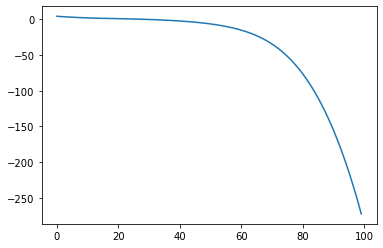

In [18]:
plt.plot(elbos)

In [4]:
rand_tens = torch.rand(4,4,requires_grad=True)
test = torch.tensor([rand_tens[i,i]+2 for i in np.arange(4)])

In [6]:
test.requires_grad

False

In [9]:
N=6
d=3
T=5

In [52]:
mu_approx = torch.ones(N,d,T-1,requires_grad=True)
sigma_inv = torch.ones(d,d,requires_grad=True)
test = sum([torch.trace(mu_approx[i,:,:].T@sigma_inv@(mu_approx[i,:,:])) for i in np.arange(N)])

In [53]:
A = torch.transpose(mu_approx,dim0=1,dim1=2)@sigma_inv@(mu_approx)

In [54]:
A = A.diagonal(offset=0, dim1=-2, dim2=-1).sum(dim=[-1,0]) 

In [56]:
test.backward()

In [48]:
A.backward()